# Data Preparation 

In this section, I first splitted data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [255]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras import layers
from keras import Model
from keras.layers import Dense
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings("ignore")


In [256]:
# TODO

df = pd.read_csv("METABRIC_RNA_Mutation.csv")
clinical_dataset = df[df.columns[:31].values]
gene_expressions = df[df.columns[31:520].values]
gene_mut_expressions = df[df.columns[520:].values]

In [257]:
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [258]:
gene_expressions['overall_survival'] = clinical_dataset['overall_survival']

In [259]:
clinical_dataset

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


In [260]:
gene_expressions

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540,1
1900,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863,0
1901,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,-0.2529,...,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264,0
1902,-1.2746,-1.7695,-0.3454,-0.3850,0.6689,1.4531,1.0956,-0.0948,-0.6188,-1.9467,...,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041,0


In [261]:
gene_mut_expressions

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,E542K,0,0,0,0,0,0,R1482*,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,V3102M,0,0,S404Kfs*104 L94Pfs*117,0,R5779C,P232L,...,0,0,0,0,0,0,0,0,0,0


## EDA

For each dataset, you must perform a sufficient EDA.

In [83]:
clinical_dataset

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


In [84]:
survival_age = clinical_dataset[["age_at_diagnosis", "cancer_type", "overall_survival"]]

In [85]:
# First we want to see the relation between cancer type and age and overall survival

px.scatter(clinical_dataset, x = "age_at_diagnosis", y = "cancer_type_detailed", color="overall_survival")



<AxesSubplot:xlabel='age_at_diagnosis', ylabel='Density'>

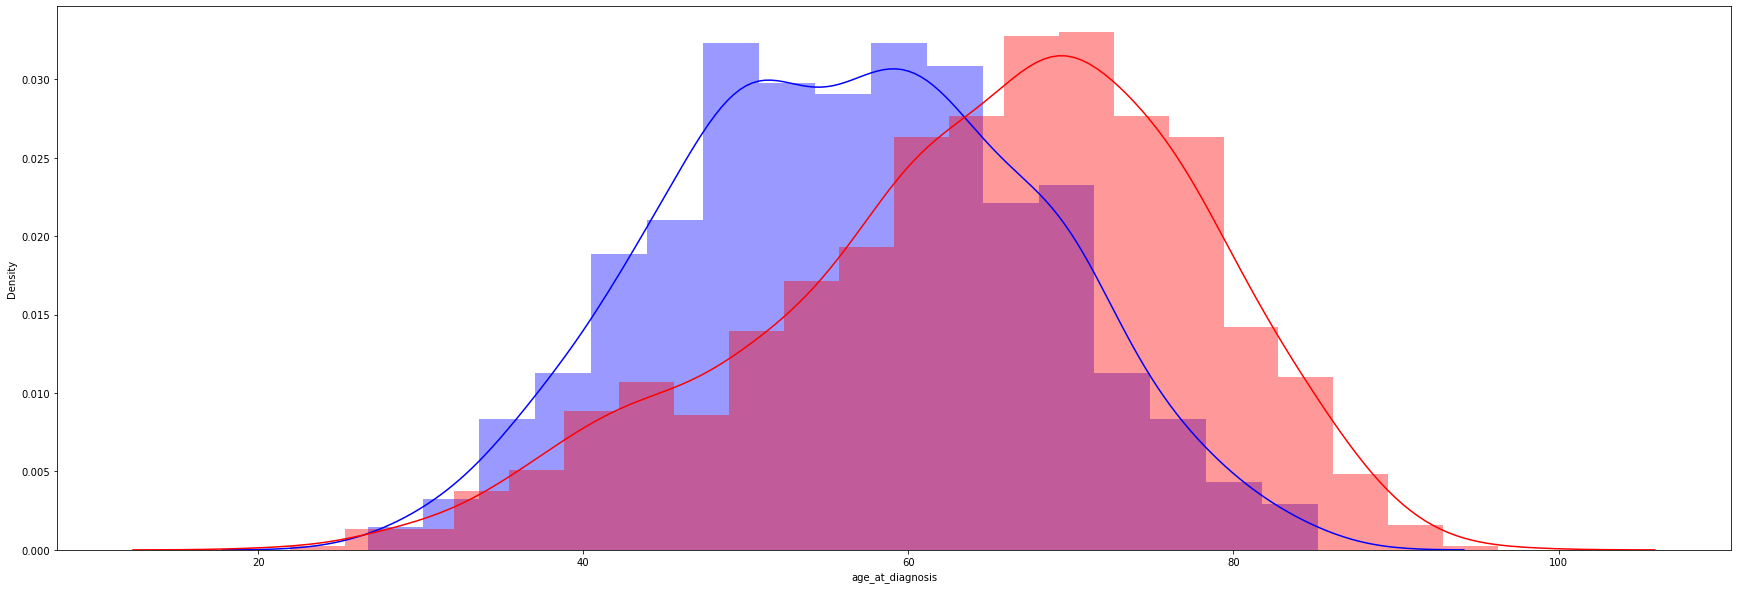

In [86]:

fig = plt.figure(figsize=(30,10))
sns.distplot(clinical_dataset["age_at_diagnosis"][clinical_dataset['overall_survival']==1], color='b', label = 'survived')
sns.distplot(clinical_dataset["age_at_diagnosis"][clinical_dataset['overall_survival']==0], color='r', label = 'died')


As we can see, elderly people are more prone to death regardless of their cancer type and younger people has more chance of survival

In [87]:
px.histogram(clinical_dataset, x="lymph_nodes_examined_positive", color="overall_survival")

As the lympth nodes examined positive increases, the chance of survival decreases.

In [57]:
	
px.histogram(clinical_dataset, x="primary_tumor_laterality", color="overall_survival")

There are as much patients with cancer in their right breast as their left breast. chance of survival is almost the same for each side.

In [60]:
# clinical_dataset['mutation_count']
px.histogram(clinical_dataset, x = "mutation_count", color="overall_survival")

Here is the mutation count histogram. The more the mutation count, the less the survival chance.

In [84]:
px.histogram(clinical_dataset, x = "overall_survival", pattern_shape="chemotherapy", text_auto=True)

The chance of survival is 42%. From those who died from cancer, about a quarter of them received chemotherapy.

In [97]:
px.histogram(clinical_dataset, x = "type_of_breast_surgery",color="overall_survival", text_auto=True)

MSTECTOMY type is far more dangerous than BREAST CONSERVING!

In [104]:

px.histogram(clinical_dataset, x = "cancer_type_detailed",color="overall_survival", text_auto=True)

In [105]:
px.histogram(clinical_dataset, x = "cancer_type",color="overall_survival", text_auto=True)

We only had 1 patient with Breast Sarcoma. It's insufficient so maybe it's better to remove this column at all.

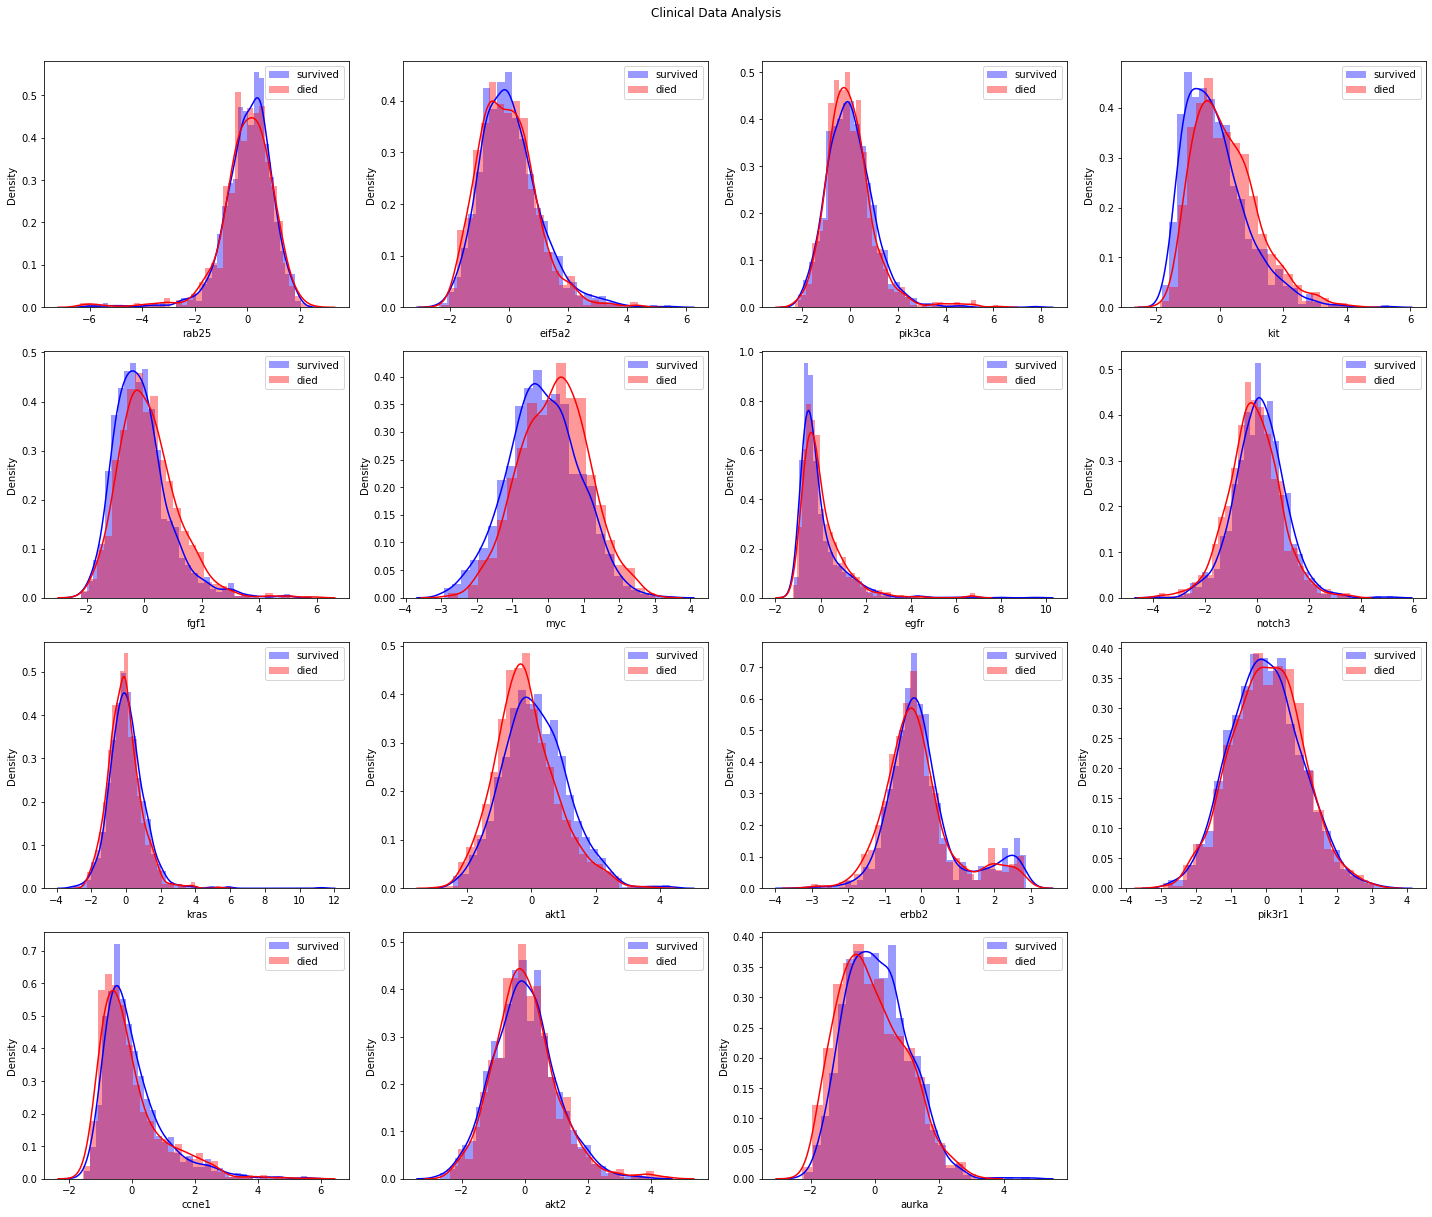

In [344]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in gene_expressions.loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(gene_expressions[i][gene_expressions['overall_survival']==0], color='b', label = 'survived')
    sns.distplot(gene_expressions[i][gene_expressions['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Preprocessing

In [262]:
clinical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [263]:
clinical_dataset['tumor_stage'].isna().sum()

501

 Tumor stage NaN rate is so high. 

In [264]:
clinical_dataset['tumor_stage'].unique()

array([ 2.,  1.,  4.,  3., nan,  0.])

So we have 5 values for this column. Let's convert all the nans to a new value 5

In [265]:
clinical_dataset['tumor_stage'] = clinical_dataset['tumor_stage'].fillna(5)

In [266]:
total = clinical_dataset.isnull().sum().sort_values(ascending = False)
percent = (clinical_dataset.isnull().sum() / clinical_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(12)


,Total_NaN,Percent_Nan
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878
tumor_other_histologic_subtype,15,0.007878


In [267]:
clinical_dataset['3-gene_classifier_subtype'].fillna("NOT AVAILABLE", inplace=True)

In [268]:
# Now let's bfill all others
clinical_dataset.bfill(inplace=True)

In [269]:
clinical_dataset

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NOT AVAILABLE,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NOT AVAILABLE,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,5.0,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NOT AVAILABLE,20.0,5.0,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NOT AVAILABLE,25.0,5.0,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,5.0,Died of Other Causes


## Dimension Reduction 

Clinical dataset has only 30 features so, it doesn't make sense to use a dim reduction technique for this dataset. but Gene Expression has 500 features. I used two techniques for this dataset. First one is PCA and the second one is Autoencoder.

## PCA

In [131]:
X_gene = gene_expressions.drop("overall_survival", axis=1)

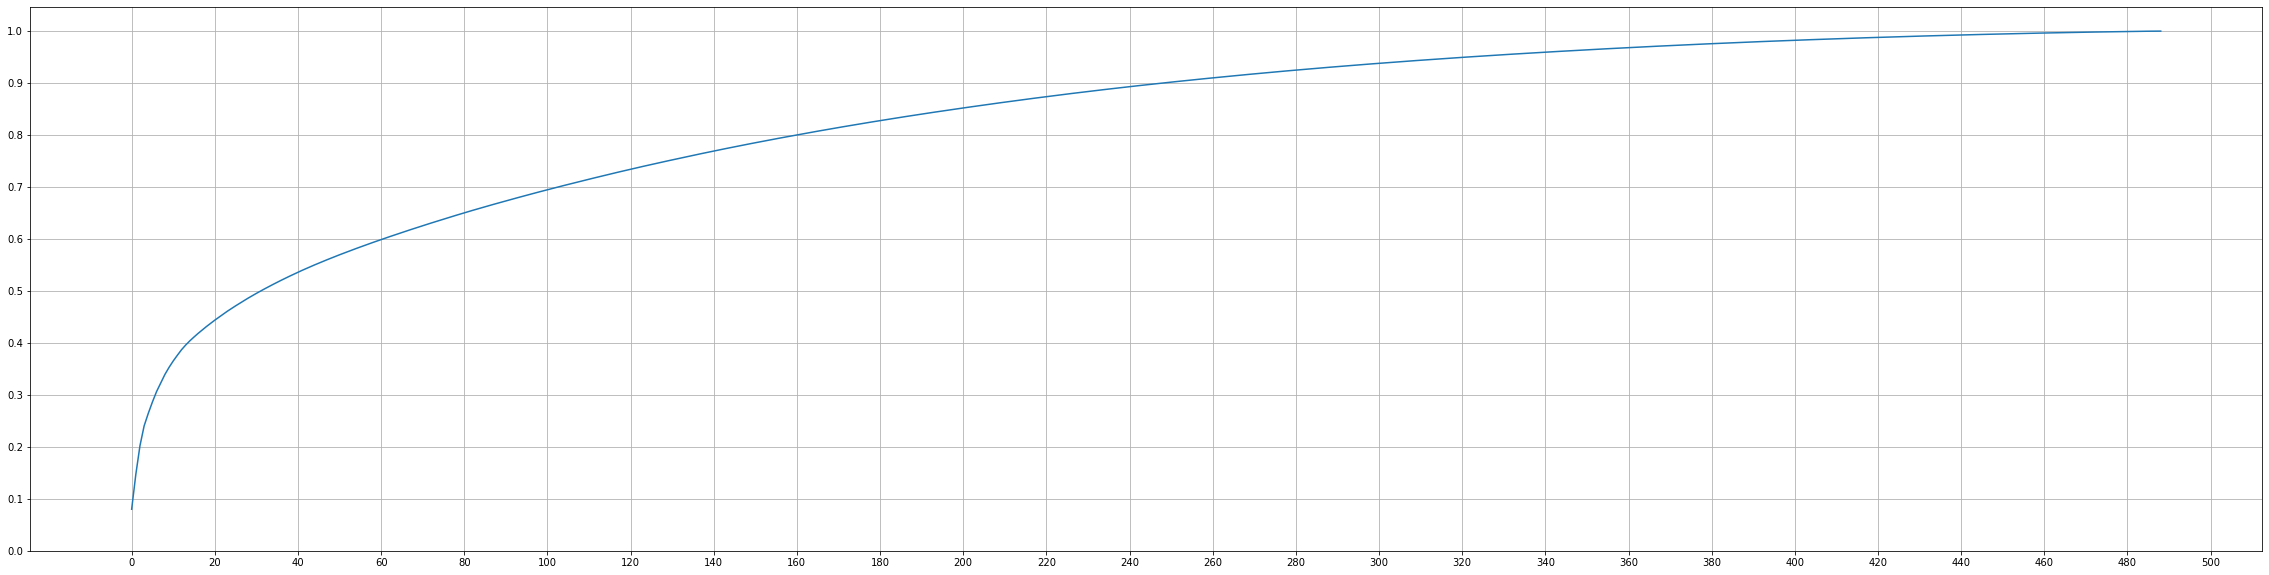

In [132]:
def find_n_pcs_explaining(data, explain_percentage):   
  pca = PCA(n_components = None, random_state = 42)
  pca.fit(data)
  var = pca.explained_variance_ratio_.cumsum()
  for i in range(len(var)):
    if var[i] > explain_percentage / 100:
      return var,i + 1

l, n = find_n_pcs_explaining(X_gene, 80)

plt.figure(figsize=(40,10))
plt.plot(l)
plt.grid()
plt.yticks([x/10 for x in range(11) ])
plt.xticks([x*20 for x in range(26) ])
plt.show()



So we need the first 160 PCs for explaining 80% of the variance in the data.

In [133]:
pca = PCA(n_components = 160, random_state = 42)
gene_expression_reduced_pca = pca.fit_transform(X_gene)


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_gene, gene_expressions['overall_survival'], test_size=0.25, random_state=42)


In [136]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

input_dim = 489
latent_vec_dim = 160

input_layer = Input(shape=(input_dim,))

# Define the autoencoder architecture
# First build the encoder
# enc_layer_1 = Dense(300, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(64, activation='sigmoid')(input_layer)
# enc_layer_3 = Dense(100, activation='sigmoid')(enc_layer_2)
enc_layer_4 = Dense(latent_vec_dim, activation='tanh')(enc_layer_2)
encoder = enc_layer_4

# Then build the decoder
# dec_layer_1 = Dense(100, activation='sigmoid')(encoder)
dec_layer_2 = Dense(64, activation='sigmoid')(encoder)
# dec_layer_3 = Dense(300, activation='sigmoid')(dec_layer_2)
dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_2)
decoder = dec_layer_4

# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name="Deep_Autoencoder")

# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
autoencoder.summary()


Model: "Deep_Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 489)]             0         
_________________________________________________________________
dense_98 (Dense)             (None, 64)                31360     
_________________________________________________________________
dense_99 (Dense)             (None, 160)               10400     
_________________________________________________________________
dense_100 (Dense)            (None, 64)                10304     
_________________________________________________________________
dense_101 (Dense)            (None, 489)               31785     
Total params: 83,849
Trainable params: 83,849
Non-trainable params: 0
_________________________________________________________________


Epoch 1/400
12/12 [==============================] - 1s 21ms/step - loss: 1.2194 - val_loss: 1.1214
Epoch 2/400
12/12 [==============================] - 0s 6ms/step - loss: 1.1148 - val_loss: 1.0278
Epoch 3/400
12/12 [==============================] - 0s 6ms/step - loss: 1.0461 - val_loss: 0.9901
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 1.0236 - val_loss: 0.9797
Epoch 5/400
12/12 [==============================] - 0s 5ms/step - loss: 1.0172 - val_loss: 0.9763
Epoch 6/400
12/12 [==============================] - 0s 5ms/step - loss: 1.0149 - val_loss: 0.9748
Epoch 7/400
12/12 [==============================] - 0s 6ms/step - loss: 1.0137 - val_loss: 0.9739
Epoch 8/400
12/12 [==============================] - 0s 6ms/step - loss: 1.0130 - val_loss: 0.9733
Epoch 9/400
12/12 [==============================] - 0s 6ms/step - loss: 1.0124 - val_loss: 0.9728
Epoch 10/400
12/12 [==============================] - 0s 5ms/step - loss: 1.0119 - val_loss: 0.9723
Epoch 11

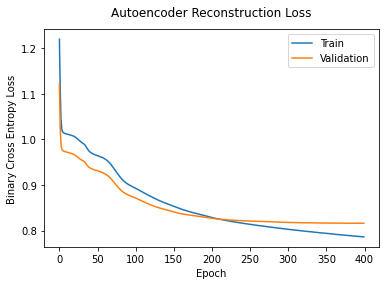

In [137]:
autoencoder.compile(loss='mse', optimizer='adam')

# Train the autoencoder with MNIST data
history = autoencoder.fit(X_train, X_train, epochs=400, batch_size=128,
                          shuffle=True, validation_data=(X_test, X_test))

# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')


In [138]:
latent_model.predict(X_train).shape

(1428, 160)

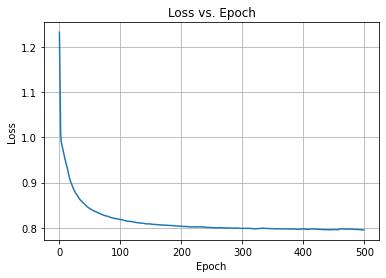

In [35]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [211]:
gene_expressions['su'] = clinical_dataset['overall_survival']

In [212]:
gene_expressions

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,su
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540,1
1900,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863,0
1901,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,-0.2529,...,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264,0
1902,-1.2746,-1.7695,-0.3454,-0.3850,0.6689,1.4531,1.0956,-0.0948,-0.6188,-1.9467,...,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041,0


## UMAP

In [224]:
from sklearn.preprocessing import StandardScaler

gene_expressions = StandardScaler().fit_transform(gene_expressions)


In [247]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(gene_expressions)
embedding.shape


(1904, 2)

Text(0.5, 1.0, 'UMAP projection')

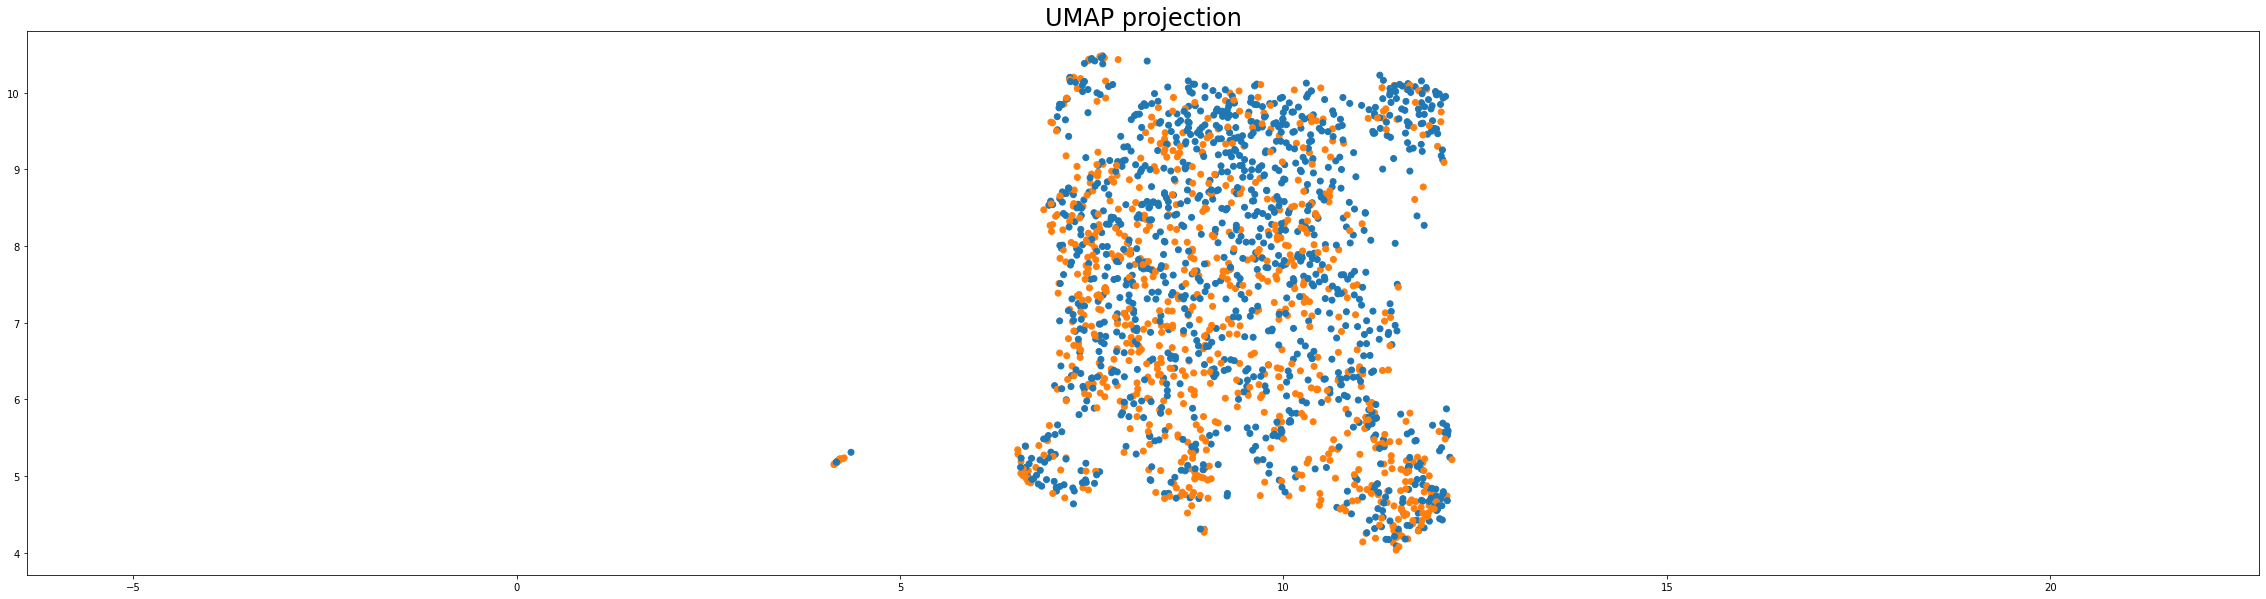

In [248]:
plt.figure(figsize=(40,10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in clinical_dataset['overall_survival']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)


# Classic Model 

In [270]:

clinical_dataset_y = clinical_dataset['overall_survival']
clinical_dataset_X = clinical_dataset.drop(['death_from_cancer', 'overall_survival', 'patient_id', 'cancer_type'], axis=1)
 

In [272]:
clinical_dataset_X = pd.get_dummies(clinical_dataset_X)
clinical_dataset_X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,...,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC,pr_status_Negative,pr_status_Positive,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_NOT AVAILABLE
0,75.65,0,1.0,3.0,1,10.0,2.0,6.044,140.500000,1,...,0,0,0,1,0,0,0,1,0,0
1,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,...,0,0,0,0,1,1,0,0,0,0
2,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,...,0,0,0,0,1,0,0,0,0,1
3,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,...,0,0,1,0,1,0,0,0,0,1
4,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,1,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,0,4.0,3.0,1,1.0,4.0,5.050,196.866667,1,...,0,0,0,0,1,0,1,0,0,0
1900,42.88,0,4.0,3.0,0,1.0,6.0,5.040,44.733333,1,...,0,0,0,1,0,0,0,0,0,1
1901,62.90,0,4.0,3.0,1,45.0,4.0,6.050,175.966667,1,...,0,0,0,0,1,0,0,0,0,1
1902,61.16,0,4.0,2.0,1,12.0,15.0,5.050,86.233333,0,...,0,0,0,0,1,1,0,0,0,0


In [281]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()    
    print(classification_report(y_test, pred))


## Clinical Dataset

In [284]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
def grid_search(X, y):
    param_grid = {
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
    }
    # Create a based model
    rf = RandomForestClassifier()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                            cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y)
    return grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


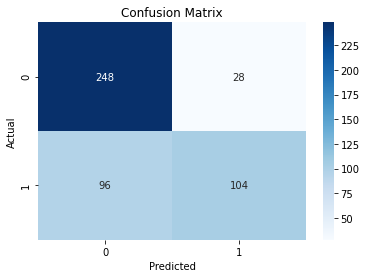

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       276
           1       0.79      0.52      0.63       200

    accuracy                           0.74       476
   macro avg       0.75      0.71      0.71       476
weighted avg       0.75      0.74      0.73       476



In [285]:
clinical_dataset_X_scaled = StandardScaler().fit_transform(clinical_dataset_X)

X_train, X_test, y_train, y_test = train_test_split(clinical_dataset_X_scaled, clinical_dataset_y, test_size=0.25, random_state=42)

# Standardizing the data

bp = grid_search(X_train, y_train)
random_forest = RandomForestClassifier(bootstrap=bp['bootstrap'],max_depth=bp['max_depth'], max_features=bp['max_features'], min_samples_leaf=bp['min_samples_leaf'], min_samples_split=bp['min_samples_split'], n_estimators=bp['n_estimators'])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_metrics(random_forest, kfold, X_train,X_test, y_train, y_test)


## Testing PCA

In [287]:

gene_expression_reduced_pca_scaled = StandardScaler().fit_transform(gene_expression_reduced_pca)

X_train, X_test, y_train, y_test = train_test_split(gene_expression_reduced_pca_scaled, clinical_dataset_y, test_size=0.25, random_state=42, stratify = y)


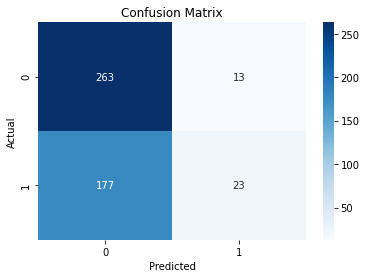

              precision    recall  f1-score   support

           0       0.60      0.95      0.73       276
           1       0.64      0.12      0.19       200

    accuracy                           0.60       476
   macro avg       0.62      0.53      0.46       476
weighted avg       0.62      0.60      0.51       476



In [290]:

bp = grid_search(X_train, y_train)

random_forest = RandomForestClassifier(bootstrap=bp['bootstrap'],max_depth=bp['max_depth'], max_features=bp['max_features'], min_samples_leaf=bp['min_samples_leaf'], min_samples_split=bp['min_samples_split'], n_estimators=bp['n_estimators'])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_metrics(random_forest, kfold, X_train,X_test, y_train, y_test)


# Testing Autoencoder

In [291]:
X_gene_ae = latent_model.predict(X_gene)
X_gene_ae_scaled = StandardScaler().fit_transform(X_gene_ae)

X_train, X_test, y_train, y_test = train_test_split(X_gene_ae_scaled, clinical_dataset_y, test_size=0.25, random_state=42)


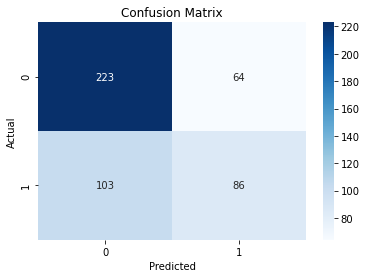

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       287
           1       0.57      0.46      0.51       189

    accuracy                           0.65       476
   macro avg       0.63      0.62      0.62       476
weighted avg       0.64      0.65      0.64       476



In [293]:
# AE
bp = grid_search(X_train, y_train)

random_forest = RandomForestClassifier(bootstrap=bp['bootstrap'],max_depth=bp['max_depth'], max_features=bp['max_features'], min_samples_leaf=bp['min_samples_leaf'], min_samples_split=bp['min_samples_split'], n_estimators=bp['n_estimators'])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_metrics(random_forest, kfold, X_train,X_test, y_train, y_test)


## Gene expressions 

In [294]:
X_gene_scaled = StandardScaler().fit_transform(X_gene)
X_train, X_test, y_train, y_test = train_test_split(X_gene_scaled, gene_expressions['overall_survival'], test_size=0.25, random_state=42)


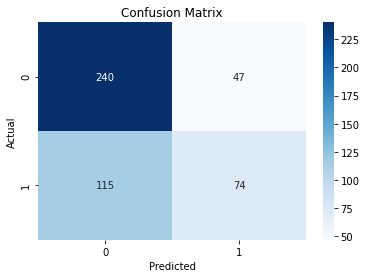

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       287
           1       0.61      0.39      0.48       189

    accuracy                           0.66       476
   macro avg       0.64      0.61      0.61       476
weighted avg       0.65      0.66      0.64       476



In [296]:
bp = grid_search(X_train, y_train)

random_forest = RandomForestClassifier(bootstrap=bp['bootstrap'],max_depth=bp['max_depth'], max_features=bp['max_features'], min_samples_leaf=bp['min_samples_leaf'], min_samples_split=bp['min_samples_split'], n_estimators=bp['n_estimators'])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)


# Neural Network 

In [151]:
def prediction_summary(y_test, pred):
    for i in range(len(pred)):
        if pred[i] < 0.5:
            pred[i] = 0
        else:
            pred[i] = 1
    print(classification_report(pred, y_test))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## PCA Gene expression

In [331]:
# Splitting the pca reduced gene expression
X_train, X_test, y_train, y_test = train_test_split(gene_expression_reduced_pca, y, test_size=0.25, random_state=42, stratify = y)


Epoch 1/15
5/5 [==============================] - 1s 34ms/step - loss: 0.4963 - accuracy: 0.5657 - val_loss: 0.3062 - val_accuracy: 0.4860
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 0.3177 - accuracy: 0.4720 - val_loss: 0.2808 - val_accuracy: 0.5280
Epoch 3/15
5/5 [==============================] - 0s 8ms/step - loss: 0.2338 - accuracy: 0.6200 - val_loss: 0.2493 - val_accuracy: 0.5909
Epoch 4/15
5/5 [==============================] - 0s 8ms/step - loss: 0.2006 - accuracy: 0.6673 - val_loss: 0.2673 - val_accuracy: 0.5664
Epoch 5/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1847 - accuracy: 0.6996 - val_loss: 0.2354 - val_accuracy: 0.6469
Epoch 6/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1580 - accuracy: 0.8065 - val_loss: 0.2253 - val_accuracy: 0.6573
Epoch 7/15
5/5 [==============================] - 0s 8ms/step - loss: 0.1487 - accuracy: 0.8144 - val_loss: 0.2246 - val_accuracy: 0.6434
Epoch 8/15
5/5 [=================

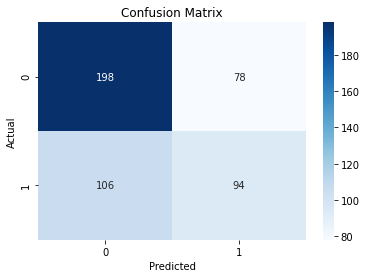

In [322]:

input_dim = X_train.shape[-1]
model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Configure the model and start training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=250, verbose=1, validation_split=0.2)
prediction_summary(y_test, model.predict(X_test))

## Autoencoder Gene Expression

In [166]:
# Splitting the pca reduced gene expression
X_train, X_test, y_train, y_test = train_test_split(X_gene, y, test_size=0.25, random_state=42, stratify = y)
X_train = latent_model.predict(X_train)
X_test = latent_model.predict(X_test)

Epoch 1/9
5/5 [==============================] - 1s 71ms/step - loss: 0.6661 - accuracy: 0.4221 - val_loss: 0.2555 - val_accuracy: 0.5350
Epoch 2/9
5/5 [==============================] - 0s 13ms/step - loss: 0.2665 - accuracy: 0.5911 - val_loss: 0.3687 - val_accuracy: 0.5455
Epoch 3/9
5/5 [==============================] - 0s 15ms/step - loss: 0.2931 - accuracy: 0.6016 - val_loss: 0.2521 - val_accuracy: 0.6084
Epoch 4/9
5/5 [==============================] - 0s 15ms/step - loss: 0.2116 - accuracy: 0.6646 - val_loss: 0.2279 - val_accuracy: 0.6259
Epoch 5/9
5/5 [==============================] - 0s 15ms/step - loss: 0.2174 - accuracy: 0.6497 - val_loss: 0.2324 - val_accuracy: 0.6119
Epoch 6/9
5/5 [==============================] - 0s 15ms/step - loss: 0.2080 - accuracy: 0.6716 - val_loss: 0.2240 - val_accuracy: 0.6399
Epoch 7/9
5/5 [==============================] - 0s 14ms/step - loss: 0.1919 - accuracy: 0.7023 - val_loss: 0.2334 - val_accuracy: 0.6399
Epoch 8/9
5/5 [===================

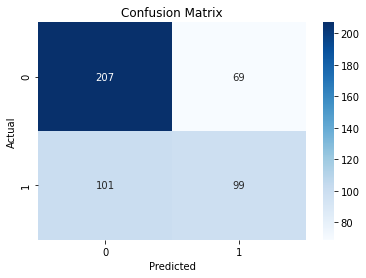

In [168]:
# TODO
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

input_dim = X_train.shape[-1]
model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Configure the model and start training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=9, batch_size=250, verbose=1, validation_split=0.2)
prediction_summary(y_test, model.predict(X_test))

## Normal Gene Expressions

Epoch 1/8
5/5 [==============================] - 0s 33ms/step - loss: 0.6393 - accuracy: 0.5832 - val_loss: 0.2871 - val_accuracy: 0.4965
Epoch 2/8
5/5 [==============================] - 0s 8ms/step - loss: 0.3245 - accuracy: 0.4772 - val_loss: 0.3220 - val_accuracy: 0.5000
Epoch 3/8
5/5 [==============================] - 0s 10ms/step - loss: 0.2805 - accuracy: 0.5455 - val_loss: 0.2362 - val_accuracy: 0.6154
Epoch 4/8
5/5 [==============================] - 0s 8ms/step - loss: 0.2031 - accuracy: 0.6769 - val_loss: 0.2676 - val_accuracy: 0.5874
Epoch 5/8
5/5 [==============================] - 0s 8ms/step - loss: 0.2013 - accuracy: 0.6646 - val_loss: 0.2475 - val_accuracy: 0.6224
Epoch 6/8
5/5 [==============================] - 0s 8ms/step - loss: 0.1727 - accuracy: 0.7504 - val_loss: 0.2212 - val_accuracy: 0.6643
Epoch 7/8
5/5 [==============================] - 0s 8ms/step - loss: 0.1586 - accuracy: 0.7968 - val_loss: 0.2196 - val_accuracy: 0.6643
Epoch 8/8
5/5 [========================

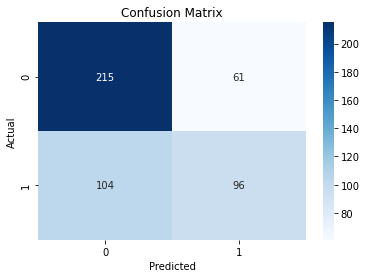

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X_gene, y, test_size=0.25, random_state=42, stratify = y)

input_dim = X_train.shape[-1]
model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Configure the model and start training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=8, batch_size=250, verbose=1, validation_split=0.2)
prediction_summary(y_test, model.predict(X_test))

# Clinical dataset

In [297]:
clinical_dataset_X_scaled = StandardScaler().fit_transform(clinical_dataset_X)

X_train, X_test, y_train, y_test = train_test_split(clinical_dataset_X_scaled, clinical_dataset_y, test_size=0.25, random_state=42)


              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       315
         1.0       0.56      0.66      0.61       161

    accuracy                           0.71       476
   macro avg       0.68      0.70      0.69       476
weighted avg       0.72      0.71      0.71       476



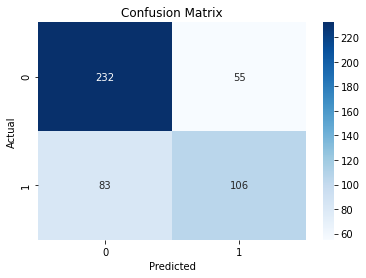

In [309]:
model = Sequential()
input_dim = X_train.shape[-1]

model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Configure the model and start training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=250, verbose=0, validation_split=0.2)
prediction_summary(y_test, model.predict(X_test))

In [277]:
pred = model.predict(X_test)

# Model Comparison 

As we can see, random forest models tend to outperform neural networks slightly. Maybe if we had more data, neural network would do better.

## Clinical Dataset:
Random Forest: 0.74 

 MLP: 0.71

## Gene Expressions:

### PCA

Random Forest: 0.60

MLP: 0.61

### Autoencoder

Random Forest: 0.65

MLP: 0.64

### Normal

Random Forest: 0.66

MLP: 0.65